In [74]:
from sklearn.datasets import make_classification
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model


In [75]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [76]:
#X2=np.array([[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 1]])

In [77]:
#TSNE(n_components=2, learning_rate='auto',init='random').fit_transform(X2)

In [78]:
ddf = pd.read_csv('all_faults.csv')

In [79]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

win_len=1000
stride=200

X=[]
Y=[]


for k in ddf['fault'].unique():
    
    df_temp_2 = ddf[ddf['fault']==k]
    
    for i in np.arange(0,len(df_temp_2)-(win_len),stride):
        temp = df_temp_2.iloc[i:i+win_len,:-1].values
        temp = temp.reshape((1,-1))
        X.append(temp)
        Y.append(df_temp_2.iloc[i+win_len,-1])
    
X=np.array(X)
X=X.reshape((X.shape[0],win_len))



Y=np.array(Y)
encoder= LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
OHE_Y = to_categorical(encoded_Y)

In [80]:
np.shape(X)

(15042, 1000)

In [81]:
np.shape(X)
encoder.classes_

array(['Trial_112', 'Trial_113', 'Trial_114', 'Trial_116', 'Trial_117',
       'Trial_118', 'trial_111', 'trial_115'], dtype='<U9')

In [82]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,OHE_Y,test_size=0.2,shuffle=True)

In [83]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(12033, 1000)
(3009, 1000)
(12033, 8)
(3009, 8)


In [84]:
#"X_pre_aen = X
#X_t_sne = TSNE(n_components=2, learning_rate='auto',verbose=1, perplexity=40, n_iter=300).fit_transform(X_pre_aen )

In [85]:
#tSNEdf = pd.DataFrame(data = X_t_sne, columns = ['t-SNE component 1', 't-SNE component 2'])
#tSNEdf['Fault']=Y

In [86]:
# Plot the PC-1 and PC-2
#fig, ax = plt.subplots(figsize=(7,7))
#sns.scatterplot(x=tSNEdf['t-SNE component 1'],y=tSNEdf['t-SNE component 2'],hue='Fault',
    #data=tSNEdf,
    #legend="full",
    #alpha=0.3)
#plt.show()

In [87]:
#tSNEdf

In [88]:
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Input,Dense, Dropout, Flatten


# from tensorflow.keras.models import load_model
# AE_model = load_model(r'Trained Model\AE_model_gear.h5')


no_classes=len(encoder.classes_)
# build a model
model = Sequential()
model.add(Dense(1024, input_shape=(X.shape[1],), activation='relu')) # input shape is (features,)
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(no_classes, activation='softmax'))
model.summary()

# compile the model
model.compile(optimizer='RMSprop', 
              loss='categorical_crossentropy', # this is different instead of binary_crossentropy (for regular classification)
              metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1024)              1025024   
                                                                 
 dense_6 (Dense)             (None, 512)               524800    
                                                                 
 dense_7 (Dense)             (None, 256)               131328    
                                                                 
 dense_8 (Dense)             (None, 128)               32896     
                                                                 
 dense_9 (Dense)             (None, 8)                 1032      
                                                                 
Total params: 1,715,080
Trainable params: 1,715,080
Non-trainable params: 0
_________________________________________________________________


In [89]:
history = model.fit(X_train,
                    y_train,
                    epochs=50, # you can set this to a big number!
                    batch_size=32,
                    shuffle=True,
                    validation_data=(X_test,y_test),
                    verbose=1)

Epoch 1/50
377/377 [==============================] - 12s 30ms/step - loss: 1.5205 - accuracy: 0.4440 - val_loss: 1.1884 - val_accuracy: 0.5826
Epoch 2/50
377/377 [==============================] - 12s 32ms/step - loss: 0.7825 - accuracy: 0.7337 - val_loss: 0.8066 - val_accuracy: 0.7391
Epoch 3/50
377/377 [==============================] - 12s 32ms/step - loss: 0.4457 - accuracy: 0.8514 - val_loss: 0.8023 - val_accuracy: 0.7524
Epoch 4/50
377/377 [==============================] - 12s 31ms/step - loss: 0.2641 - accuracy: 0.9151 - val_loss: 0.7967 - val_accuracy: 0.7866
Epoch 5/50
377/377 [==============================] - 11s 30ms/step - loss: 0.1952 - accuracy: 0.9399 - val_loss: 0.9519 - val_accuracy: 0.7870
Epoch 6/50
377/377 [==============================] - 12s 32ms/step - loss: 0.1361 - accuracy: 0.9590 - val_loss: 1.2683 - val_accuracy: 0.7803
Epoch 7/50
377/377 [==============================] - 12s 32ms/step - loss: 0.1237 - accuracy: 0.9646 - val_loss: 1.0340 - val_accuracy:

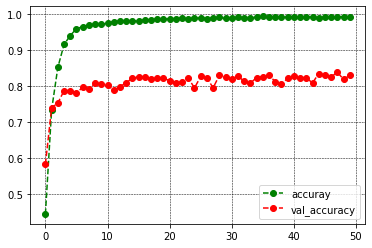

In [90]:
plt.plot(history.history['accuracy'],'go--')
plt.plot(history.history['val_accuracy'],'ro--')
plt.legend(['accuray','val_accuracy'])
plt.grid(color='k', linestyle='--', linewidth=0.5)
plt.show()

In [91]:
model.save('model.h5')

In [92]:
y_pred=model.predict(X_test)
print(y_pred)
print(y_pred.shape)

[[1.7331080e-28 1.0000000e+00 2.5780379e-16 ... 2.9952755e-19
  3.0902103e-29 2.5471631e-19]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [3.2464341e-05 9.9993205e-01 6.1989266e-07 ... 2.2878576e-05
  6.5672270e-16 7.0354522e-09]
 ...
 [7.4553336e-31 1.0000000e+00 1.2828303e-12 ... 1.2043013e-19
  7.1223829e-21 2.7371885e-15]
 [4.7581297e-11 1.0000000e+00 1.2649614e-13 ... 1.3032748e-13
  1.4970354e-14 4.2005622e-12]
 [1.0000000e+00 6.0107702e-29 3.5359764e-29 ... 1.5307954e-14
  2.9095679e-15 2.8386580e-22]]
(3009, 8)


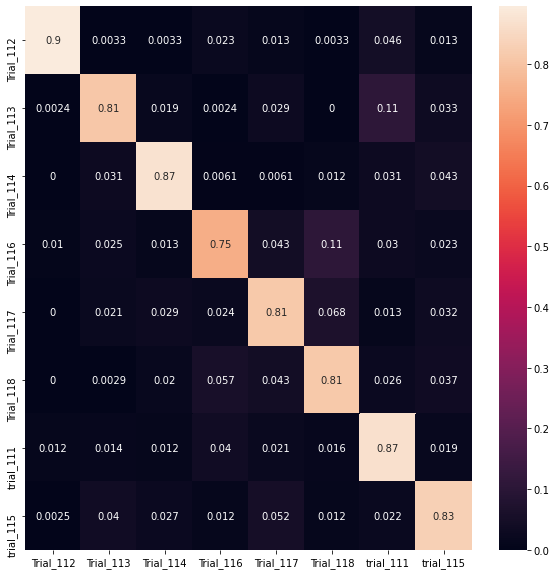

In [93]:
def inv_Transform_result(y_pred):    
    y_pred = y_pred.argmax(axis=1)
    y_pred = encoder.inverse_transform(y_pred)
    return y_pred






Y_pred=inv_Transform_result(y_pred)
Y_test = inv_Transform_result(y_test)




from sklearn.metrics import confusion_matrix


plt.figure(figsize=(10,10))
cm = confusion_matrix(Y_test, Y_pred,normalize='true')
f = sns.heatmap(cm, annot=True,xticklabels=encoder.classes_,yticklabels=encoder.classes_)
plt.show()

In [95]:
from tensorflow import keras
import tensorflow as tf
model = keras.models.load_model('model.h5')
# if used same model file, the mappings will remain same
mappings = ['Trial_112', 'Trial_113', 'Trial_114', 'Trial_116', 'Trial_117', 'Trial_118', 'trial_111', 'trial_115']
ddf = pd.read_csv('test.csv')
# taking first 1000 entries from file
x = np.array(ddf['vibrations'][:1000])
x = tf.expand_dims(x, 0)
out = model.predict(x)
print(out)
out = out.flatten()
# print(out)
# print(np.max(out))
res = np.max(out)
temp = np.where(out==res)
# listl = []
# for t in temp :
#     listl.append(t[0])
# print(listl)
print(temp)
print(mappings[temp[0][0]])

[[0.0000000e+00 2.2001538e-25 4.0151988e-38 2.8578465e-29 4.0363899e-09
  5.2851820e-27 0.0000000e+00 1.0000000e+00]]
(array([7], dtype=int64),)
trial_115


In [1]:
type(temp)

NameError: name 'temp' is not defined

In [22]:
dummy_ann = Model(inputs=model.input,outputs=model.layers[-2].output)
y_viz = dummy_ann.predict(X_train)
y_viz.shape

(12033, 128)

In [20]:
def T_SNE_plot(X_train,y_train,model,encoder):
    
    dummy_ann = Model(inputs=model.input,outputs=model.layers[-2].output)
    y_viz = dummy_ann.predict(X_train)
    
    from sklearn.manifold import TSNE

    X_t_sne = TSNE(n_components=2, learning_rate='auto',verbose=1, perplexity=40, n_iter=300).fit_transform(y_viz)

    tSNEdf = pd.DataFrame(data = X_t_sne, columns = ['T-SNE component 1', 'T-SNE component 2'])

    tSNEdf['Fault']=inv_Transform_result(y_train)


    # Plot the PC-1 and PC-2
    fig, ax = plt.subplots(figsize=(10,10))
    sns.scatterplot(x=tSNEdf['T-SNE component 1'],y=tSNEdf['T-SNE component 2'],hue='Fault',
        data=tSNEdf,
        legend="full",
        alpha=0.3)
    plt.show()

C:\Users\abulf\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 6898 samples in 0.016s...
[t-SNE] Computed neighbors for 6898 samples in 1.148s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6898
[t-SNE] Computed conditional probabilities for sample 2000 / 6898
[t-SNE] Computed conditional probabilities for sample 3000 / 6898
[t-SNE] Computed conditional probabilities for sample 4000 / 6898
[t-SNE] Computed conditional probabilities for sample 5000 / 6898
[t-SNE] Computed conditional probabilities for sample 6000 / 6898
[t-SNE] Computed conditional probabilities for sample 6898 / 6898
[t-SNE] Mean sigma: 7.617738
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.619194
[t-SNE] KL divergence after 300 iterations: 2.045338


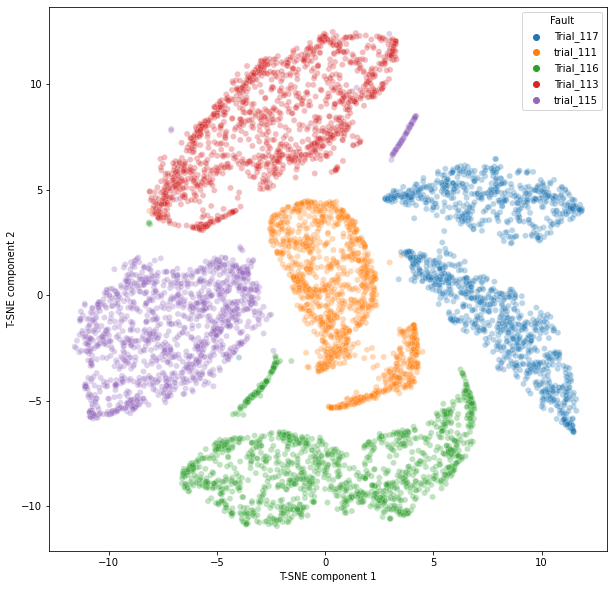

In [21]:
T_SNE_plot(X_train,y_train,model,encoder)

In [23]:

import pickle    

pickle.dump(y_pred, open('ANN_.pkl', 'wb')) 


In [25]:
from flask import Flask, render_template, request
model = pickle.load(open('ANN_.pkl', 'rb'))

app = Flask(__name__)

@app.route('/')
def man():
    return render_template('Project.html')

@app.route('/predict', methods=['POST'])
def home():
    data1 = request.form['acceleration']
    arr = DE_data
    pred = model.predict(arr)
    return render_template('after.html', data=pred)


if __name__ == "__main__":
    app.run(debug=True)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Restarting with windowsapi reloader


SystemExit: 1

C:\Users\abulf\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3426: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [25]:
#Column 1 
DE_data=ttk.Label(win,text="DE_data")
DE_data.grid(row=0,column=0,sticky=tk.W)
DE_data_var=tk.StringVar()
DE_data_entrybox=ttk.Entry(win,width=16,textvariable=DE_data_var)
DE_data_entrybox.grid(row=0,column=1)

In [26]:
import pandas as pd
ddf = pd.DataFrame()
def action():
    global DB
    import pandas as pd
    ddf = pd.DataFrame(columns=['DE_data'])
    DE_DATA=DE_data_var.get()
    ddf.loc[0,'DE_data']=DE_DATA
print(ddf.shape)
DB=ddf
def Output():
    DB["DE_data"] = pd.to_numeric(DB["DE_data"])

(0, 0)


In [ ]:
output=model.predict(DB)
    if output==[1]:
        result='Diabetic'
    elif output==0:
        result='Non-Diabetic'
    elif output==0:
        result='Non-Diabetic'
    elif output==0:
        result='Non-Diabetic'
    elif output==0:
        result='Non-Diabetic'